# Drawing on Images

## Import Libraries

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Blank Image

In [54]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int16)

In [55]:
blank_img.shape

(512, 512, 3)

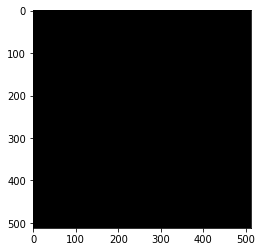

In [56]:
plt.imshow(blank_img);

## Rectangle
- pt1: Top Left Corner
- pt2: Bottom Right Corner

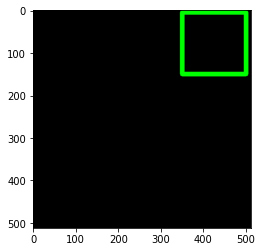

In [57]:
cv2.rectangle(blank_img, pt1=(350,5), pt2=(500,150), color=(0,255,0), thickness=10)
plt.imshow(blank_img);

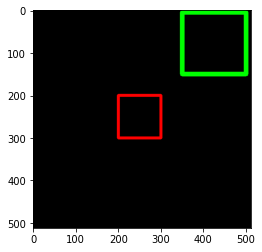

In [58]:
cv2.rectangle(blank_img, pt1=(200,200), pt2=(300,300), color=(255,0,0), thickness=5)
plt.imshow(blank_img);

## Circles

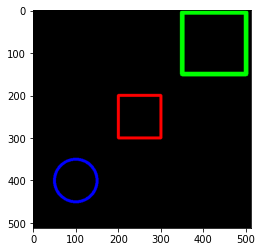

In [59]:
cv2.circle(blank_img, center=(100,400), radius=50, color=(0,0,255), thickness=5)
plt.imshow(blank_img);

## Filled Shapes

- Thickness = -1

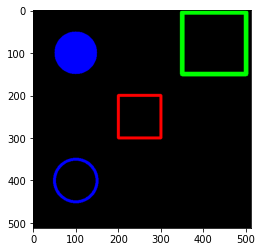

In [60]:
cv2.circle(blank_img, center=(100,100), radius=50, color=(0,0,255), thickness=-1)
plt.imshow(blank_img);

## Lines

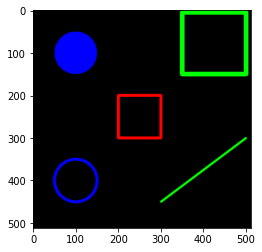

In [61]:
cv2.line(blank_img, pt1=(300,450), pt2=(500,300), color=(0,255,0),thickness=3)
plt.imshow(blank_img);

## Text

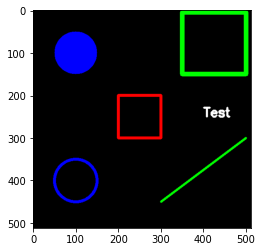

In [62]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img, text='Test', org=(400,250), fontFace=font, fontScale=1, color=(255,255,255), thickness=3, lineType=cv2.LINE_AA)
plt.imshow(blank_img);

## Custom Polygons
- Set the vertices
- Reshape from 2D to 3D

In [63]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int16)

In [64]:
vertices = np.array([[100,300],[200,450],[400,400],[400,100]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 450],
       [400, 400],
       [400, 100]])

In [65]:
vertices.shape

(4, 2)

In [66]:
pts = vertices.reshape((-1,1,2))

In [67]:
pts.shape

(4, 1, 2)

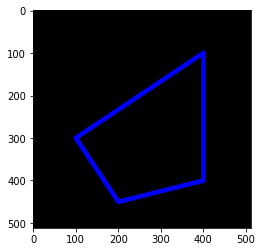

In [68]:
cv2.polylines(blank_img, [pts], isClosed=True, color=(0,0,255), thickness=10)
plt.imshow(blank_img);

## Draw with your mouse

In [49]:
##############
## FUNCTION ##
##############

def draw_circle(event, x, y, flags, param):
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, center=(x,y), radius=100, color=(0,255,0), thickness=-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, center=(x,y), radius=50, color=(255,255,0), thickness=-1)

cv2.namedWindow(winname='my_drawing')

cv2.setMouseCallback('my_drawing', draw_circle)

###############################
## SHOWING IMAGE WITH OPENCV ##
###############################

img = np.zeros((512,512,3), dtype=np.int8)

while True:
    
    cv2.imshow('my_drawing', img)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

In [71]:
###############
## VARIABLES ##
###############
# True while mouse button down, False while mouse button up
drawing = False
ix, iy = -1,-1

##############
## FUNCTION ##
##############

def draw_rectangle(event, x, y, flags, param):
    
    global ix,iy,drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, (ix,iy), (x,y), color=(255,0,0), thickness=-1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, (ix,iy), (x,y), color=(255,0,0), thickness=-1)


cv2.namedWindow(winname='my_drawing')

cv2.setMouseCallback('my_drawing', draw_rectangle)

###############################
## SHOWING IMAGE WITH OPENCV ##
###############################

img = np.zeros((512,512,3), dtype=np.int8)

while True:
    
    cv2.imshow('my_drawing', img)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()